In [65]:
# Install seaborn package
!pip3 install seaborn

In [66]:
# Import modules from analysis.ipynb

import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [67]:
# Get CSV

non_motorist_df = pd.read_csv("data/Crash_Reporting_-_Non-Motorists_Data.csv")
county_df = pd.read_csv("data/Crash_Reporting_-_Drivers_Data.csv")
state_df = pd.read_csv("data/Maryland_Statewide_Vehicle_Crashes.csv")

In [71]:
# Reduce the columns in a slow simmer

county_reduced_df = county_df[['Report Number','Local Case Number','ACRS Report Type','Related Non-Motorist','Driver Substance Abuse','Non-Motorist Substance Abuse','Driver At Fault','Injury Severity','Circumstance','Driver Distracted By','Speed Limit']]
non_motorist_reduced_df = non_motorist_df[['Report Number','Local Case Number','Pedestrian Type','Pedestrian Movement','Pedestrian Actions','Pedestrian Location','Pedestrian Obeyed Traffic Signal','Pedestrian Visibility','At Fault']]

In [72]:
# Add columns to a new DataFrame for all visualizations

driver_distraction_df = pd.merge(county_reduced_df,non_motorist_reduced_df,on=['Report Number','Local Case Number'])
driver_distraction_df = driver_distraction_df.rename(columns={'At Fault':'Pedestrian At Fault'})
driver_distraction_df.head()

,Report Number,Local Case Number,ACRS Report Type,Related Non-Motorist,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Speed Limit,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,Pedestrian At Fault
0,MCP28000052,220014387,Injury Crash,OTHER CONVEYANCE,NONE DETECTED,"N/A, NONE DETECTED",Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,0,OTHER CONVEYANCE,Walking/Cycling on Sidewalk,NO IMPROPER ACTIONS,DRIVEWAY ACCESS MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No
1,MCP28000052,220014387,Injury Crash,OTHER CONVEYANCE,NONE DETECTED,"N/A, NONE DETECTED",Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,0,OTHER CONVEYANCE,Walking/Cycling on Sidewalk,NO IMPROPER ACTIONS,DRIVEWAY ACCESS MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No
2,MCP32390021,220015651,Injury Crash,PEDESTRIAN,UNKNOWN,NaN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,25,PEDESTRIAN,Unknown,NO IMPROPER ACTIONS,ON ROADWAY NOT AT CROSSWALK,NaN,MIXED CLOTHING,No
3,EJ78890025,220014084,Injury Crash,PEDESTRIAN,UNKNOWN,NONE DETECTED,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,5,PEDESTRIAN,Standing,NO IMPROPER ACTIONS,OTHER,NO PED. SIGNAL,DARK CLOTHING,No
4,MCP2720006P,220015282,Injury Crash,PEDESTRIAN,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,30,PEDESTRIAN,Cross/Enter at Intersection,UNKNOWN,ON ROADWAY AT CROSSWALK,OBEYED PED. SIGNAL,UNKNOWN,No


In [73]:
# CSV transformation for convenience

driver_distraction_df.to_csv("data/Driver_Distraction.csv",index=False)

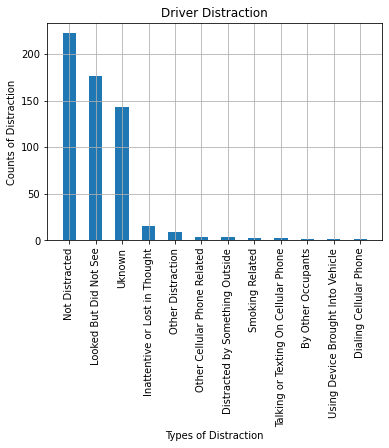

<Figure size 432x288 with 0 Axes>

In [79]:
# Bar Graph to count driver distractions

ddb = pd.value_counts(driver_distraction_df['Driver Distracted By'].values,sort=True)

ddb_x_axis = np.arange(len(ddb))
tick_locations = [value for value in ddb_x_axis]
plt.xticks(tick_locations,['Not Distracted','Looked But Did Not See','Uknown','Inattentive or Lost in Thought','Other Distraction','Other Cellular Phone Related','Distracted by Something Outside','Smoking Related','Talking or Texting On Cellular Phone','By Other Occupants','Using Device Brought Into Vehicle','Dialing Cellular Phone'],rotation='vertical')

plt.bar(ddb_x_axis,ddb,width=0.50)

plt.title("Driver Distraction")
plt.xlabel("Types of Distraction")
plt.ylabel("Counts of Distraction")
plt.grid()

plt.show()
plt.savefig("images/Driver_Distractions.png")

In [80]:
# Table to view the types of distractions with ACRS report type

ACRS_distraction_grouped = driver_distraction_df.groupby(['ACRS Report Type','Driver Distracted By']).size()
ACRS_distraction_grouped

ACRS Report Type       Driver Distracted By                        
Fatal Crash            NOT DISTRACTED                                    5
                       TALKING OR LISTENING TO CELLULAR PHONE            1
                       UNKNOWN                                          10
Injury Crash           BY OTHER OCCUPANTS                                2
                       DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT      4
                       INATTENTIVE OR LOST IN THOUGHT                   13
                       LOOKED BUT DID NOT SEE                          163
                       NOT DISTRACTED                                  195
                       OTHER CELLULAR PHONE RELATED                      4
                       OTHER DISTRACTION                                 9
                       SMOKING RELATED                                   3
                       TALKING OR LISTENING TO CELLULAR PHONE            2
                       UNKNOWN  

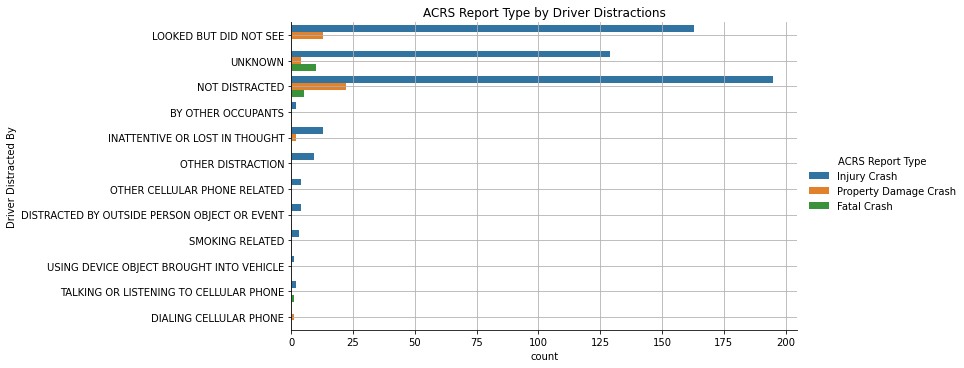

In [81]:
# Bar Graph to count driver distractions

sns.catplot(data=driver_distraction_df,y='Driver Distracted By',hue='ACRS Report Type',kind='count',aspect=60/25)
plt.grid()
plt.title("ACRS Report Type by Driver Distractions")
plt.savefig("images/Driver_Distractions.png")

In [82]:
# Table to view the types of substance abuse with ACRS report type

ACRS_substance_grouped = driver_distraction_df.groupby(['ACRS Report Type','Driver Substance Abuse']).size()
ACRS_substance_grouped

ACRS Report Type       Driver Substance Abuse
Fatal Crash            NONE DETECTED              10
                       UNKNOWN                     1
Injury Crash           ALCOHOL CONTRIBUTED         2
                       ALCOHOL PRESENT             8
                       ILLEGAL DRUG PRESENT        1
                       NONE DETECTED             355
                       UNKNOWN                    72
Property Damage Crash  NONE DETECTED              30
                       UNKNOWN                     3
dtype: int64

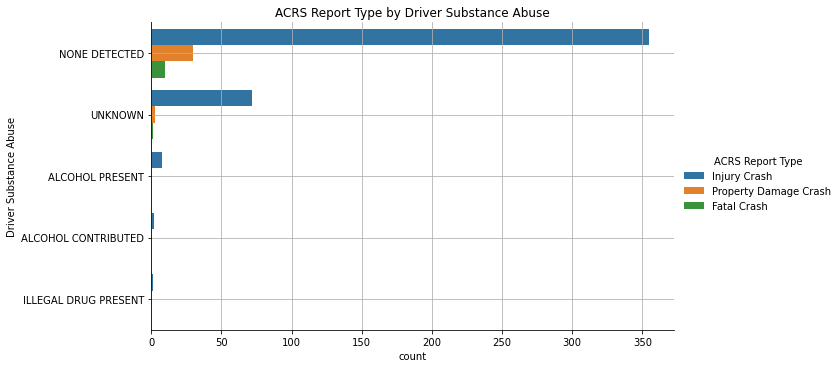

In [83]:
# Graph to viewsubstance abuse with ACRS report type

sns.catplot(data=driver_distraction_df,y='Driver Substance Abuse',hue='ACRS Report Type',kind='count',aspect=30/15)
plt.grid()
plt.title("ACRS Report Type by Driver Substance Abuse")
plt.savefig("images/Driver_Substance_Abuse.png")